# Quasi-Newton methods: BFGS

In [2]:
import numpy as np
import jax
import jax.numpy as jnp
import scipy.optimize
import scipy as sp
import matplotlib.pyplot as plt

# We enable double precision in JAX
from jax.config import config

config.update("jax_enable_x64", True)

Consider the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function), that is minimized in $\mathbf{x} = (1,1,\dots,1)^T$:

$$\mathcal{L}(\mathbf{x}) = \sum_{i=1}^{N-1} [100 (x_{i+1} - x_i^2 )^2 + (1-x_i)^2]$$

In [3]:
def loss(x):
    return sum(100.0 * (x[1:] - x[:-1] ** 2) ** 2 + (1 - x[:-1]) ** 2)

Use `jax` to compute and compile the Rosenbrock function and its gradient.

In [4]:
grad = jax.grad(loss)

loss_jit = jax.jit(loss)
grad_jit = jax.jit(grad)

Implement the BFGS method (with line search) for the minimization of the Rosenbrock function.
Set a maximum of 1000 epochs and a stopping tolerance on the gradient eucledian norm of $10^{-8}$. Employ an initial guess for $\mathbf{x}$ with random numbers in the interval $[0,2]$.

In [28]:
N = 100
max_epochs = 1000
tol = 1e-8

np.random.seed(1)
x = np.random.rand(N) * 2
dx = grad_jit(x)
I = jnp.eye(N)
B_inv = I.copy()
history = [loss_jit(x)]

epoch = 0
while epoch < max_epochs and np.linalg.norm(dx) > tol:
    epoch += 1
    # search direction
    p = -B_inv @ dx
    # line search
    line_search = sp.optimize.line_search(loss_jit, grad_jit, x, p, maxiter=1000)
    alpha = line_search[0]
    x_new = x + alpha * p
    dx_new = grad_jit(x_new)
    # Sherman-Morrison update
    s = x_new - x
    y = dx_new - dx
    E = I - np.outer(y, s) / np.inner(y, s)
    B_inv = E.T @ B_inv @ E + np.outer(s, s) / np.inner(y, s)
    l = loss_jit(x_new)
    history.append(l)
    x = x_new
    dx = dx_new
    # print updates
    print("--- epoch %d" % epoch)
    print("loss: %1.3e" % l)
    print("gradient 2 norm: %1.3e" % np.linalg.norm(dx))

--- epoch 1
loss: 7.382e+03
gradient 2 norm: 4.952e+03
--- epoch 2
loss: 4.066e+03
gradient 2 norm: 2.503e+03
--- epoch 3
loss: 3.017e+03
gradient 2 norm: 1.933e+03
--- epoch 4
loss: 2.479e+03
gradient 2 norm: 1.510e+03
--- epoch 5
loss: 2.295e+03
gradient 2 norm: 1.419e+03
--- epoch 6
loss: 2.179e+03
gradient 2 norm: 1.342e+03
--- epoch 7
loss: 2.116e+03
gradient 2 norm: 1.290e+03
--- epoch 8
loss: 2.070e+03
gradient 2 norm: 1.267e+03
--- epoch 9
loss: 2.035e+03
gradient 2 norm: 1.248e+03
--- epoch 10
loss: 2.019e+03
gradient 2 norm: 1.268e+03
--- epoch 11
loss: 1.984e+03
gradient 2 norm: 1.250e+03
--- epoch 12
loss: 1.951e+03
gradient 2 norm: 1.238e+03
--- epoch 13
loss: 1.911e+03
gradient 2 norm: 1.211e+03
--- epoch 14
loss: 1.810e+03
gradient 2 norm: 1.163e+03
--- epoch 15
loss: 1.675e+03
gradient 2 norm: 1.163e+03
--- epoch 16
loss: 1.309e+03
gradient 2 norm: 9.353e+02
--- epoch 17
loss: 1.073e+03
gradient 2 norm: 9.330e+02
--- epoch 18
loss: 9.802e+02
gradient 2 norm: 7.764e+02
-

In [29]:
np.linalg.norm(x - np.ones(N))

2.4811603643377168e-11

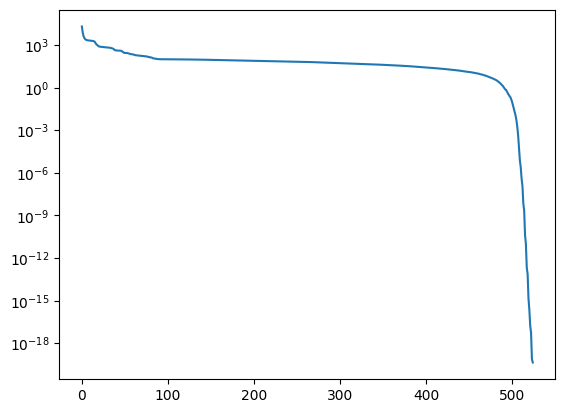

In [30]:
plt.semilogy(history)